In [90]:
#Perceptron to solve for OR, then XOR function

In [91]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [101]:
######################
######   OR    ######
#####################

#first, a perceptron (using a manually defined step function) that solves for OR

In [103]:
#data is truth table for OR (data: input pairs; labels: output T/F values), with constant bias

T, F = 1., -1.
bias = 1.

train_in = [
    [T, T, bias],
    [T, F, bias],
    [F, T, bias],
    [F, F, bias],
]

train_out = [
    [T],
    [T],
    [T],
    [F],
]

In [93]:
#initilizing the weight tensor from a random distribution
w = tf.Variable(tf.random_normal([3,1]))

In [94]:
#writing my own step function thresholded at 0
def step(x):
    condition = tf.greater(x,0)
    as_float = tf.to_float(condition)
    return tf.sub(tf.mul(as_float, 2), 1)

In [95]:
#setting up the model

#forward pass through perceptron (weight matrix and step function)
output = step(tf.matmul(train_in, w))

#finding error and mse
error = tf.sub(train_out, output)
mse = tf.reduce_mean(tf.square(error))

In [96]:
#finding the delta to update the weights (rudimentary SGD)
delta = tf.matmul(train_in, error, transpose_a=True)
train = tf.assign(w, tf.add(w, delta))

In [97]:
#setting up TF
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [98]:
#for plotting
epoch_set = []
error_set = []

#train 10 epochs (10 is plenty for convergence here)
err, target = 1, 0
for epoch in range(10):
    if (err == target):
        break
    err, _ = sess.run([mse, train])
    
    #for plotting error
    error_set = np.append(error_set, err)
    epoch_set = np.append(epoch_set, epoch)
        
    print('epoch:', epoch, "mse:", err)

epoch: 0 mse: 3.0
epoch: 1 mse: 1.0
epoch: 2 mse: 0.0


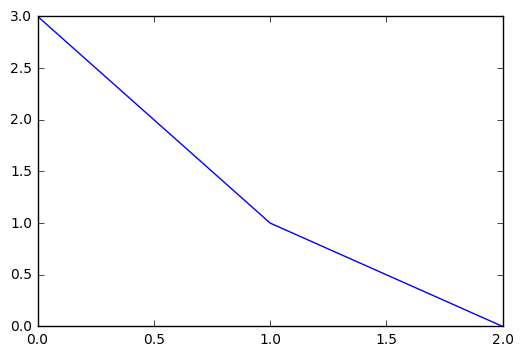

In [99]:
#plot error convergence as network trains
plt.plot(epoch_set, error_set)
plt.show()

In [105]:
#####################
######   XOR   ######
#####################

#first, a multilayer perceptron (using tanh activation, and only two layers) that solves for XOR

In [106]:
#data is truth table for XOR (data: input pairs; labels: output T/F values)

T, F = 1., -1.

train_in = [
 [T, T],
 [T, F],
 [F, T],
 [F, F],
]

train_out = [
 [F],
 [T],
 [T],
 [F],
]

In [107]:
#this model has a hidden layer because XOR is more complex than OR

w1 = tf.Variable(tf.random_normal([2,2]))
b1 = tf.Variable(tf.zeros([2]))

w2 = tf.Variable(tf.random_normal([2,1]))
b2 = tf.Variable(tf.zeros([1]))


out1 = tf.tanh(tf.add(tf.matmul(train_in, w1), b1))
out2 = tf.tanh(tf.add(tf.matmul(out1, w2), b2))

#finding error and mse
error = tf.sub(train_out, out2)
mse = tf.reduce_mean(tf.square(error))

In [113]:
#using SGD as my optimizer (not writing deltas by hand as done for OR)
train = tf.train.GradientDescentOptimizer(0.1).minimize(mse)

In [114]:
#for plotting
error_set = []
epoch_set = []

#training epochs
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    err, target = 1, 0.01
    epoch, max_epochs = 0, 5000
    while err > target and epoch < max_epochs:
        epoch += 1
        err, _ = sess.run([mse, train])
        
        #for plotting error
        error_set = np.append(error_set, err)
        epoch_set = np.append(epoch_set, epoch)

        
    print('epoch:', epoch, 'mse:', err)

epoch: 818 mse: 0.00995112


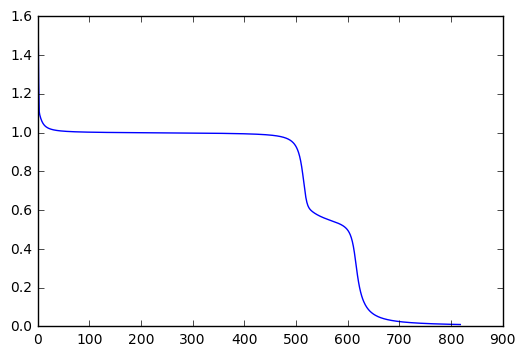

In [115]:
#plot error convergence as network trains
plt.plot(epoch_set, error_set)
plt.show()